<a href="https://colab.research.google.com/github/uzmabanoshahzad/Step00_hello-world/blob/master/25_10_24_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install gdown
import gdown

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('plant.csv') # Enclose the filename in quotes to treat it as a string literal.
df.dtypes

,0
Soil_Type,object
Sunlight_Hours,float64
Water_Frequency,object
Fertilizer_Type,object
Temperature,float64
Humidity,float64
Growth_Milestone,int64


In [39]:
# prompt: change column y name to target

df = df.rename(columns={'Soil_Type': 'target'})


In [40]:
# prompt: show unique target

print(df['target'].unique())

['loam' 'sandy' 'clay']


In [41]:
# prompt: break into training and test sets with 30% test data

from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train

,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
12,4.381350,daily,organic,26.087081,52.076525,1
41,9.578186,weekly,organic,27.848386,54.631255,1
168,7.528000,weekly,none,22.000000,70.400000,0
190,4.934000,bi-weekly,none,24.500000,61.700000,0
185,7.321000,daily,chemical,20.300000,47.300000,1
...,...,...,...,...,...,...
106,5.229000,bi-weekly,organic,24.700000,52.100000,1
14,5.951100,weekly,none,23.392001,47.545751,1
92,7.214648,weekly,none,22.784034,75.546359,0
179,5.233000,daily,organic,31.800000,47.900000,1


In [43]:
y_train

,target
12,sandy
41,loam
168,clay
190,loam
185,sandy
...,...
106,loam
14,clay
92,sandy
179,sandy


In [44]:
# prompt: encode X_train, y_train and X_test, y_test data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Assuming X_train and X_test have categorical features that need encoding
# You can choose the appropriate encoding method based on your data
# Here, we use OneHotEncoder for demonstration purposes

from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on X_train and transform both X_train and X_test
X_train_encoded = enc.fit_transform(X_train[categorical_cols]).toarray()
X_test_encoded = enc.transform(X_test[categorical_cols]).toarray()

# Combine encoded features with numerical features
# Assuming X_train has numerical features
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number'])

X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)


In [45]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., 26.08708105,
        52.07652507,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., 27.84838556,
        54.63125521,  1.        ],
       [ 0.        ,  0.        ,  1.        , ..., 22.        ,
        70.4       ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., 22.78403357,
        75.54635922,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., 31.8       ,
        47.9       ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ..., 22.        ,
        55.        ,  1.        ]])

In [46]:
y_train

array([2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 1])

In [47]:
# prompt: train using KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
X_test

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  8.82203246, 26.50948356, 35.94089581,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  5.612     , 19.2       , 61.6       ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  7.01607414, 34.81010284, 52.78283764,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  8.317     , 27.5       , 60.3       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  6.356     , 30.8       , 63.7       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  5.163     , 31.5       , 50.8       ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  8.37763707, 19.95461979

In [49]:
y_pred = knn.predict(X_test)

y_pred

array([2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2])

In [50]:
y_test

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0])

In [51]:
# prompt: calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.41379310344827586


In [52]:
# prompt: show classification report and matrix

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        23
           1       0.35      0.33      0.34        18
           2       0.31      0.29      0.30        17

    accuracy                           0.41        58
   macro avg       0.40      0.40      0.40        58
weighted avg       0.41      0.41      0.41        58

[[13  6  4]
 [ 5  6  7]
 [ 7  5  5]]


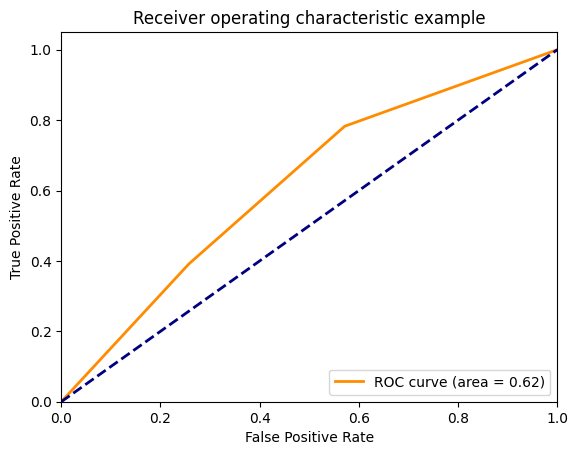

In [53]:
# prompt: plot roc

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1]) # Assuming two classes
y_pred_proba = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [54]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(y_train)
print("Class weights:", class_weights)

Class weights: {0: 1.5340909090909092, 1: 1.5340909090909092, 2: 1.4361702127659575}


In [55]:
# prompt: fit X_train and y_train into Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1.5340909090909092, 1: 1.5340909090909092,
                                 2: 1.4361702127659575})

In [56]:
print(model.coef_)
print(model.intercept_)

[[-0.84219742 -0.21374344  0.15147544 -0.21859368 -0.26601356 -0.41985819
   0.14464115  0.01351105  0.00665314 -0.27855484]
 [ 0.86609994 -0.11028809 -0.01682605 -0.00986588  0.21548892  0.53336276
  -0.17971735 -0.00088279 -0.00294432  0.27457817]
 [-0.02390251  0.32403154 -0.13464939  0.22845956  0.05052464 -0.11350457
   0.03507619 -0.01262826 -0.00370882  0.00397666]]
[-1.01226623  0.82583447  0.18643176]


In [58]:
X_test

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  8.82203246, 26.50948356, 35.94089581,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  5.612     , 19.2       , 61.6       ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  7.01607414, 34.81010284, 52.78283764,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  8.317     , 27.5       , 60.3       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  6.356     , 30.8       , 63.7       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  5.163     , 31.5       , 50.8       ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  8.37763707, 19.95461979

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_pred

array([1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1])

In [61]:
y_test

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0])

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.39655172413793105


In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.43      0.43        23
           1       0.33      0.50      0.40        18
           2       0.57      0.24      0.33        17

    accuracy                           0.40        58
   macro avg       0.44      0.39      0.39        58
weighted avg       0.44      0.40      0.39        58

[[10 12  1]
 [ 7  9  2]
 [ 7  6  4]]


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test is your multi

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test is your multi-class target variable
n_classes = len(np.unique(y_test))  # Get the number of classes

# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for all classes
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class or micro-average
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

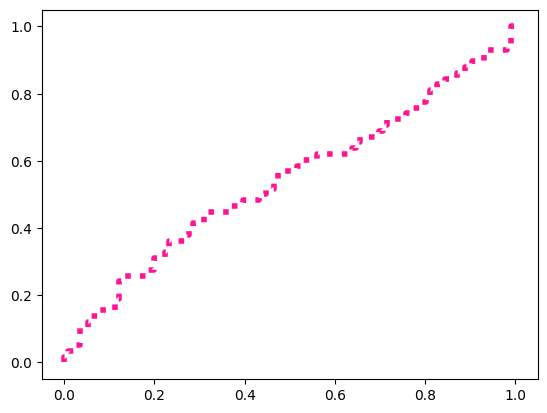

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for all classes
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class or micro-average
plt.figure()
# Example: plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Or plot individual ROC curves for each class
# ...
plt.show()

In [71]:
# prompt: import decisiontree

from sklearn.tree import DecisionTreeClassifier

In [72]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
df = pd.read_csv('plant.csv')
df.dtypes

,0
Soil_Type,object
Sunlight_Hours,float64
Water_Frequency,object
Fertilizer_Type,object
Temperature,float64
Humidity,float64
Growth_Milestone,int64


In [89]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [94]:
df = df.rename(columns={'Humidity': 'target'})

In [95]:
print(df['target'].unique())

[61.59186061 52.4222761  44.66053858 46.43322727 63.6259228  67.61872647
 69.57895219 69.48090714 34.56030515 54.72101524 32.877938   57.47644412
 52.07652507 74.38520914 47.54575063 35.85335082 37.1495841  68.07553159
 60.91090317 35.05613381 34.20534031 65.04845657 33.63815032 71.09300296
 65.31211136 34.06743903 34.2418857  79.33197893 48.71353979 48.53210735
 70.63997836 77.36242887 79.30005319 67.66890926 48.81297928 34.17503583
 68.8573458  57.92021249 51.21110046 75.31771925 35.55987412 54.63125521
 30.56768224 53.4330321  32.81516378 35.94089581 35.87631234 62.46051511
 67.30224396 59.16843825 78.10862742 48.74352898 44.28560431 73.42995641
 41.17979193 78.16112697 30.60772373 78.49394134 32.1579956  74.55715568
 56.38505545 79.64823981 33.68982824 57.69271422 78.46512678 56.15489221
 61.46993191 64.78743445 52.72705324 61.377904   59.2157156  75.05790052
 32.27231902 44.04815948 77.5205742  74.51318919 52.78283764 61.00662989
 43.86905915 39.40605799 53.18492025 47.6676114  59

In [96]:
df.drop('Soil_Type', axis=1, inplace=True)

In [97]:
df.head()

,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,target,Growth_Milestone
0,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,4.033133,weekly,organic,28.919484,52.422276,1
2,8.892769,bi-weekly,none,23.179059,44.660539,0
3,8.241144,bi-weekly,none,18.465886,46.433227,0
4,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [98]:
df.shape

(193, 6)

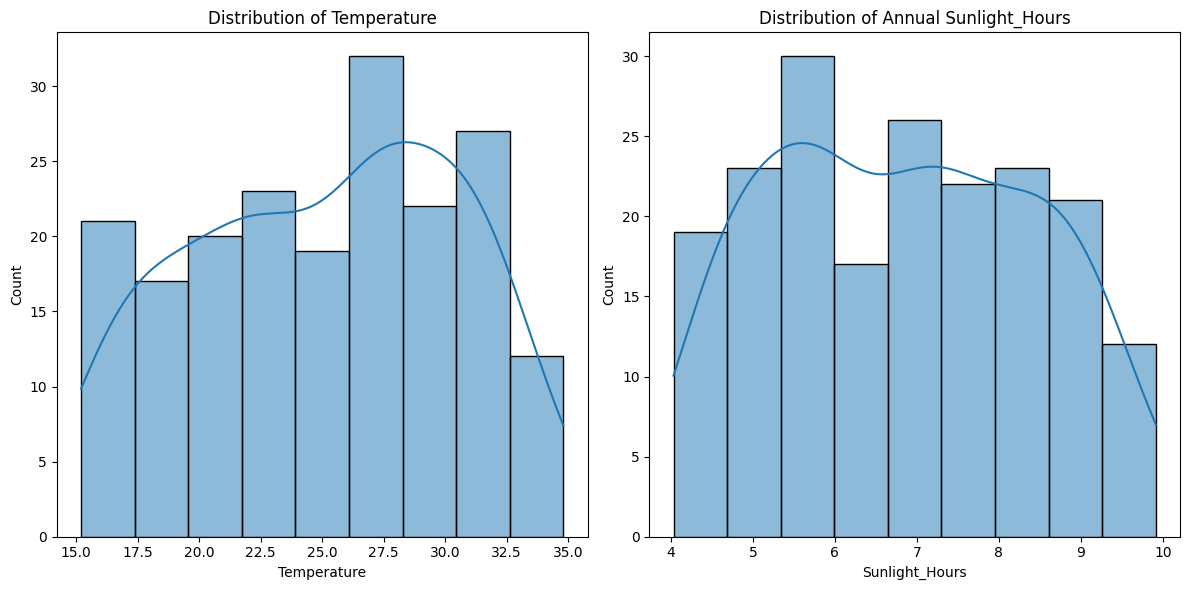

In [99]:
# prompt: plot distribution for age and annualSalary

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Temperature'], kde=True)
plt.title('Distribution of Temperature')

plt.subplot(1, 2, 2)
sns.histplot(df['Sunlight_Hours'], kde=True)
plt.title('Distribution of Annual Sunlight_Hours')

plt.tight_layout()
plt.show()

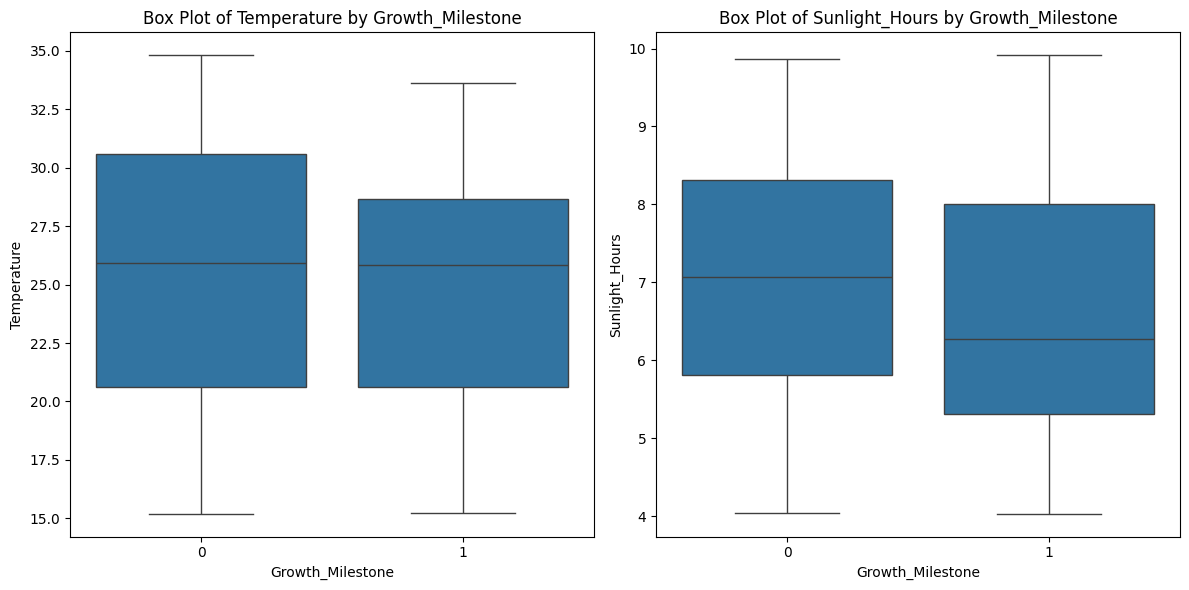

In [102]:
# prompt: box plot for both

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Growth_Milestone', y='Temperature', data=df)
plt.title('Box Plot of Temperature by Growth_Milestone')

plt.subplot(1, 2, 2)
sns.boxplot(x='Growth_Milestone', y='Sunlight_Hours', data=df)
plt.title('Box Plot of Sunlight_Hours by Growth_Milestone')

plt.tight_layout()

plt.show()

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop('Growth_Milestone', axis=1)
y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train.head()

,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Growth_Milestone
12,4.381350,daily,organic,26.087081,1
41,9.578186,weekly,organic,27.848386,1
168,7.528000,weekly,none,22.000000,0
190,4.934000,bi-weekly,none,24.500000,0
185,7.321000,daily,chemical,20.300000,1


In [112]:
y_train.head()

,Growth_Milestone
12,1
41,1
168,0
190,0
185,1


In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the preprocessor (ColumnTransformer)
categorical_cols = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols.tolist()),
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [113]:
y_test

,Growth_Milestone
45,1
137,1
76,0
144,0
113,0
152,0
15,1
18,1
16,0
9,1


In [119]:
# prompt: import decisiontree

from sklearn.tree import DecisionTreeClassifier

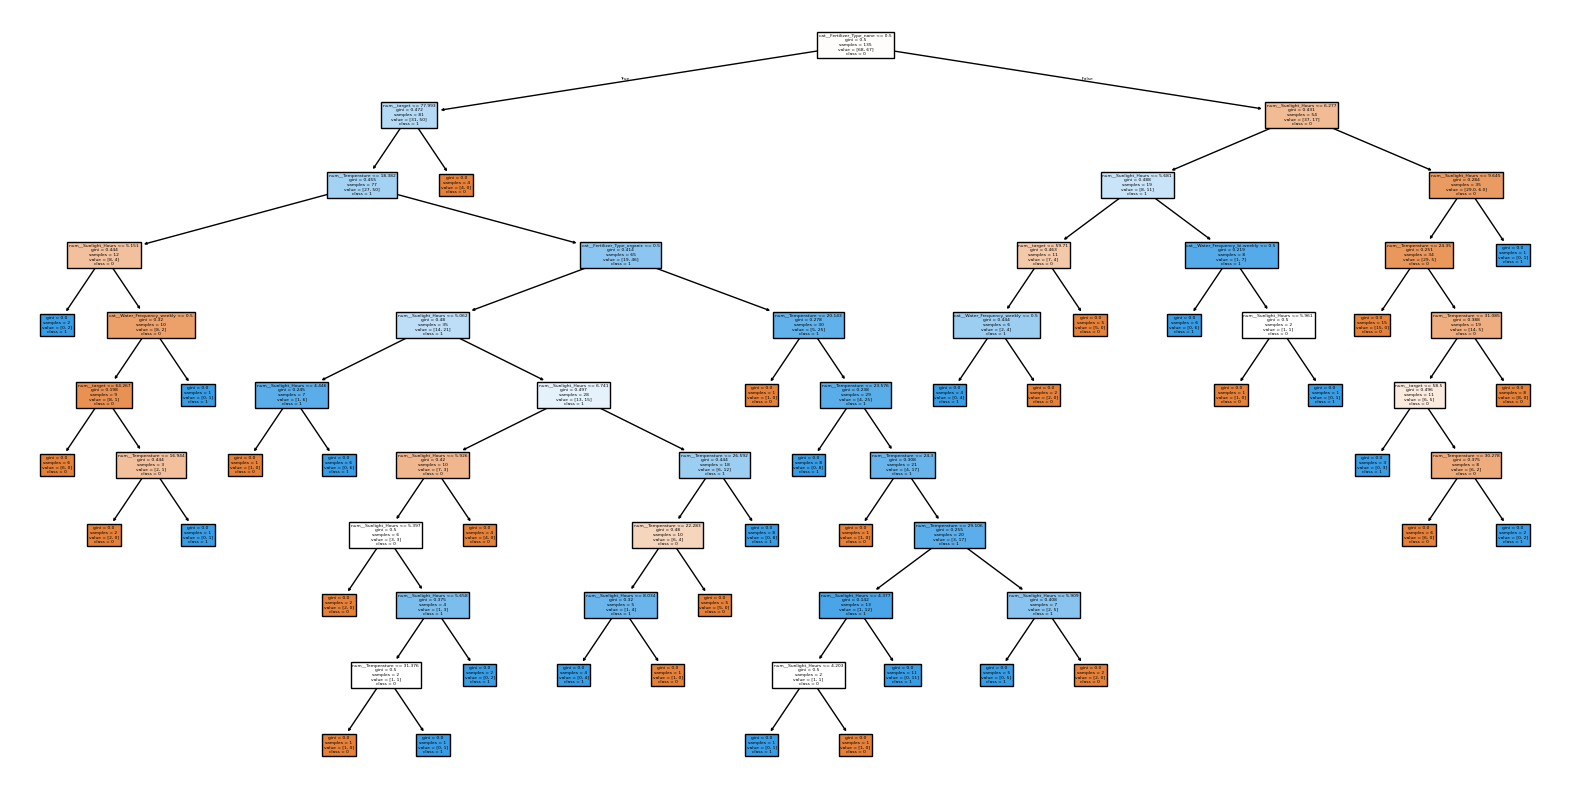

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the preprocessor (ColumnTransformer)
categorical_cols = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols.tolist()),
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


# Assuming 'model' is your fitted DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train) # This line is added for demonstration purposes. Replace with your actual model fitting code.


# Get feature names after OneHotEncoding
feature_names = preprocessor.get_feature_names_out()

# Plot the decision tree with the correct feature names
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()

In [123]:
y_pred = model.predict(X_test)

In [124]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [125]:
y_test

,Growth_Milestone
45,1
137,1
76,0
144,0
113,0
152,0
15,1
18,1
16,0
9,1


In [126]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46551724137931033


In [127]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.38      0.42        29
           1       0.47      0.55      0.51        29

    accuracy                           0.47        58
   macro avg       0.46      0.47      0.46        58
weighted avg       0.46      0.47      0.46        58

[[11 18]
 [13 16]]


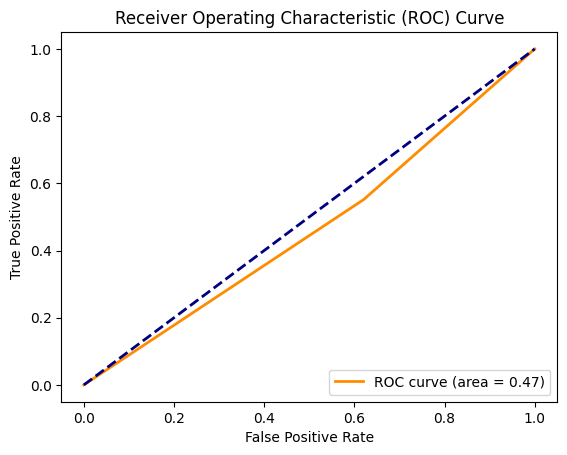

In [128]:
# prompt: roc curve

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()